<a href="https://colab.research.google.com/github/Alohadron/PyTorch-for-Deep-Learning-Bootcamp/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.5.1+cu124


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. `HealthCare` - Used in medical imaging (e.g., detecting tumors in X-rays and MRIs), sugical assistance, and disease diagnostic throught AI-powered image analysis.

2. `Manufacturing & Quality Control` - Applied in automated defect detection, product inspection, and robotics for assembly line monitoring.

3. `Autonomous Vehicle & Transportation` - Enables self-driving cars to detect objects, read traffic signs, and navigate environments using cameras and AI.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting is machine learning occurs when a model learns the training data too well, inclucing its noise and random fluctuations,
instead of generalizing to new, unseen data. This leads to high accuracy on training data but poor preformances on validation or test data.

### Causes of Overfitting:
* **Excessive Complexity** - Too many parameters or features in the model.
* **Insufficient Data** - Not enough training samples, leading to memorization rather than pattern learning.
* **Noisy Data** - The model learns random noise as if it were a real pattern.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

### How to prevent Overfitting:
1. **Regularization** - Techniques like L1 (Lasso) and L2 (Ridge) regularization add penalties to large coefficients.

2. **More Training Data** - Increasing dataset size improves generalization.

3. **Dropout (for Neural Networks)** - Randomly drops neurons during training to prevent reliance on specific features.

4. **Cross-Validation** - Splitting data into multiple training and validation sets.

5. **Pruning (for Decision Trees)** - Reduces unnecessary branches in tree-based models.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

+

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Setup training data
train_data = datasets.MNIST(
    root="data", # Where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we turn them into Torch tensors
    target_transform=None, # A function/transform that takes in the target and transforms it.
)

# Setup testind data
test_data = datasets.MNIST(
    root="data",
    train=False, # get the test data
    download=True,
    transform=ToTensor()
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [5]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [7]:
# How many classes?
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

Image shape before: torch.Size([1, 28, 28])
Image shape after: torch.Size([28, 28])


Text(0.5, 1.0, '5 - five')

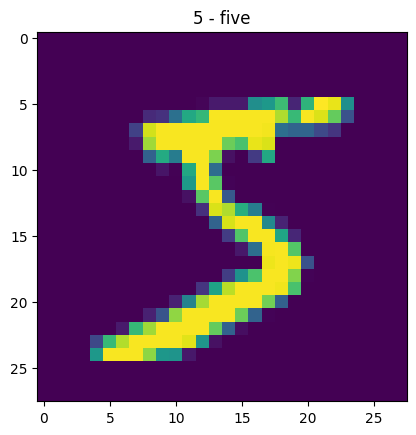

In [8]:
# Visualize the data
image, label = train_data[0]
print(f"Image shape before: {image.shape}")
print(f"Image shape after: {image.squeeze().shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

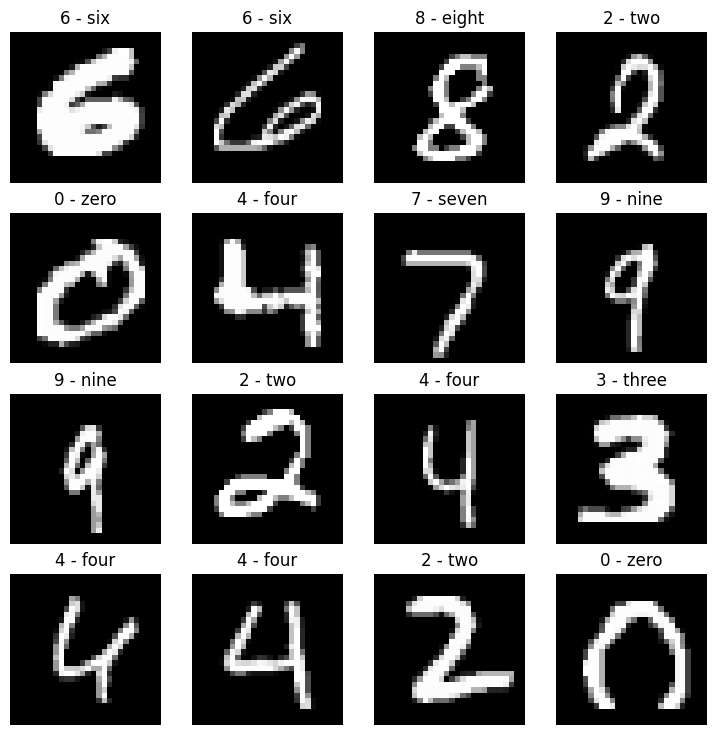

In [9]:
# See more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

1875 313
torch.Size([32, 1, 28, 28]) torch.Size([32])


(-0.5, 27.5, 27.5, -0.5)

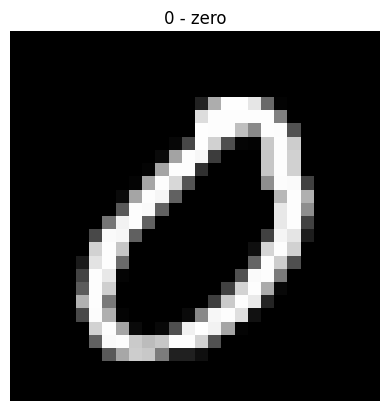

In [10]:
from torch.utils.data import DataLoader

# Put data in batches
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)
print(len(train_dataloader), len(test_dataloader))

# Check batches
X_batch, y_batch = next(iter(train_dataloader))
print(X_batch.shape, y_batch.shape)

# Visualize a sample from batches
# torch.manual_seed(42)
rand_idx = torch.randint(0, len(X_batch), size=[1]).item()
img, label = X_batch[rand_idx], y_batch[rand_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [11]:
# Convolutional Neural Network (CNN)
class MNISTModel(nn.Module):
  def __init__(self, input: int, hidden: int, output: int):
    super().__init__()
    # Block 1
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input,
                  out_channels=hidden,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden,
                  out_channels=hidden,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    # Block 2
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden, hidden, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden, hidden, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    # Classifier Layer
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden*7*7, output)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    # print(x.shape)
    x = self.block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x


torch.manual_seed(42)
model = MNISTModel(1, 10, output=len(class_names)).to(device)
model

MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [12]:
# Trai function
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for X, y in data_loader:
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)
        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()  # Use loss.item() to avoid adding tensors directly
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Optimizer zero grad, loss backward, optimizer step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate the avg loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.5f}%")


In [13]:
# Test function
def test_step(model: nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss += loss_fn(test_pred, y).item()
      test_acc += accuracy_fn(y_true = y,
                             y_pred = test_pred.argmax(dim=1))

  test_loss /= len(data_loader)
  test_acc /= len(data_loader)
  print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.5f}")


In [14]:
# Getting loss function, optimizer, and accuracy_fn

def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    return correct / len(y_true) * 100

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [15]:
torch.manual_seed(42)
# Measure time
from timeit import default_timer as timer
start_time = timer()

# Train & Test
from tqdm.auto import tqdm
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch+1}\n----------")
  train_step(model=model,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

end_time = timer()
total_time = end_time - start_time
print(f"Train & Test time on {device}: {total_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1
----------
Train loss: 1.10306 | Train accuracy: 61.61000%
Test loss: 0.21453 | Test accuracy: 93.40056
Epoch: 2
----------
Train loss: 0.16053 | Train accuracy: 95.11667%
Test loss: 0.09462 | Test accuracy: 97.00479
Epoch: 3
----------
Train loss: 0.10512 | Train accuracy: 96.78333%
Test loss: 0.08413 | Test accuracy: 97.42412
Epoch: 4
----------
Train loss: 0.08504 | Train accuracy: 97.39500%
Test loss: 0.06151 | Test accuracy: 98.10304
Epoch: 5
----------
Train loss: 0.07507 | Train accuracy: 97.64333%
Test loss: 0.06088 | Test accuracy: 98.14297
Train & Test time on cpu: 272.541 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [16]:
# Create evaluation function
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """Evaluating a given model on a given dataset"""

  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Avg loss and acc
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_accuracy": acc}

model_results = eval_model(model, test_dataloader, loss_fn, accuracy_fn)
model_results

{'model_name': 'MNISTModel',
 'model_loss': 0.0608755424618721,
 'model_accuracy': 98.1429712460064}

In [43]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

print(f"Test sample shape: {test_samples[0].shape}\nTest label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample shape: torch.Size([1, 28, 28])
Test label: 1 (1 - one)


In [44]:
# Create a make_predictions function for the pre-trained model
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  # Data would be a list of features
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data: # (for each feature in the list of features, as they would be X)
      # Prepare sample
      # unsqueeze due to shape error
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logit)
      pred_logit = model(sample)

      # Get prediction probability
      # If don't do the squeeze, softmax will work on batcher -> output: ([1, 1, 1, 1, 1, 1, 1, 1, 1])
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

      # Get pred probs off GPU for further calculations (Matplotlib)
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs).argmax(dim=1)

# Make predictions on test samples with the pre-trained model
pred_labels = make_predictions(model=model, data=test_samples)
pred_labels[:2]

tensor([1, 1])

In [45]:
test_labels, pred_labels

([1, 1, 0, 5, 1, 5, 1, 4, 7], tensor([1, 1, 0, 5, 1, 5, 1, 4, 7]))

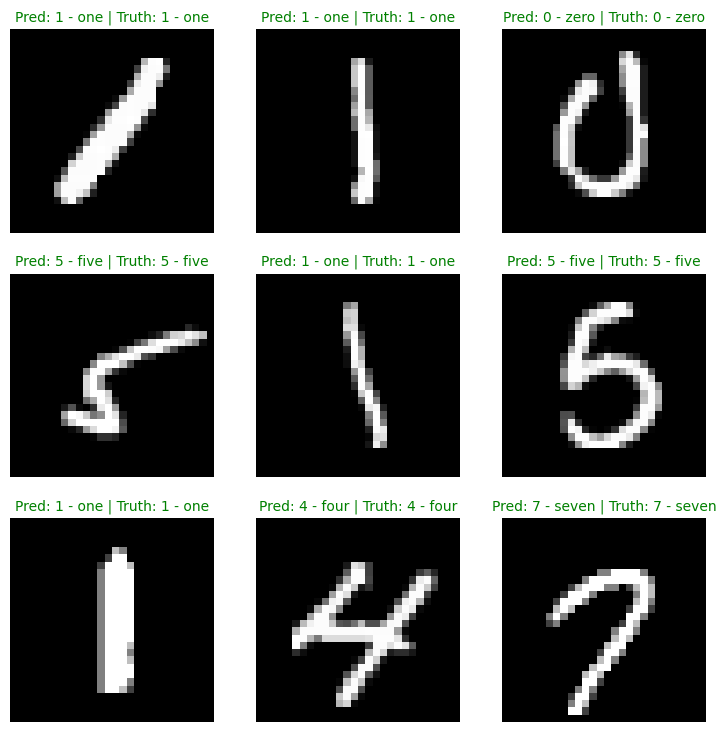

In [46]:
# Plot predictions (fun part:) )
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # PLot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label in text form
  pred_label = class_names[pred_labels[i]]

  # Get the truth label in text form
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change the title colour accordingly
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
    plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [47]:
# See if torchmetrics exists, if not, install it
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


In [48]:
# Get the predictions from all the data
from tqdm.auto import tqdm
torch.manual_seed(42)
# Make predictions with trained model
y_preds = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    y_logit = model(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())


y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

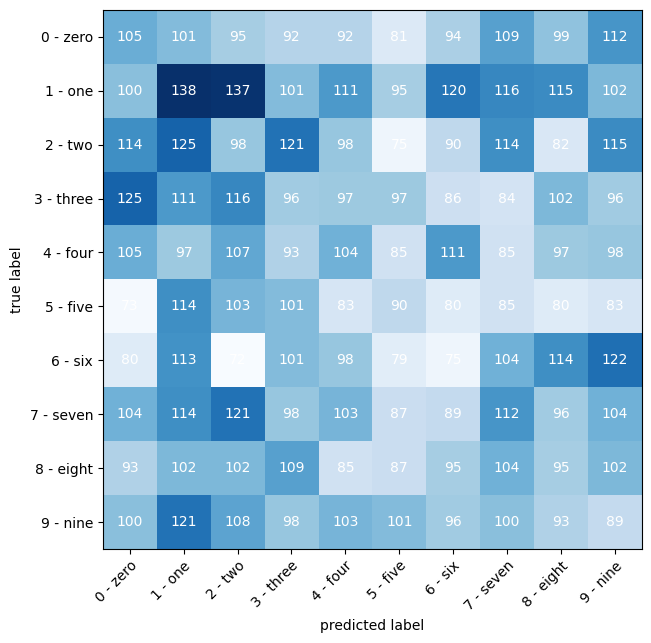

In [54]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);


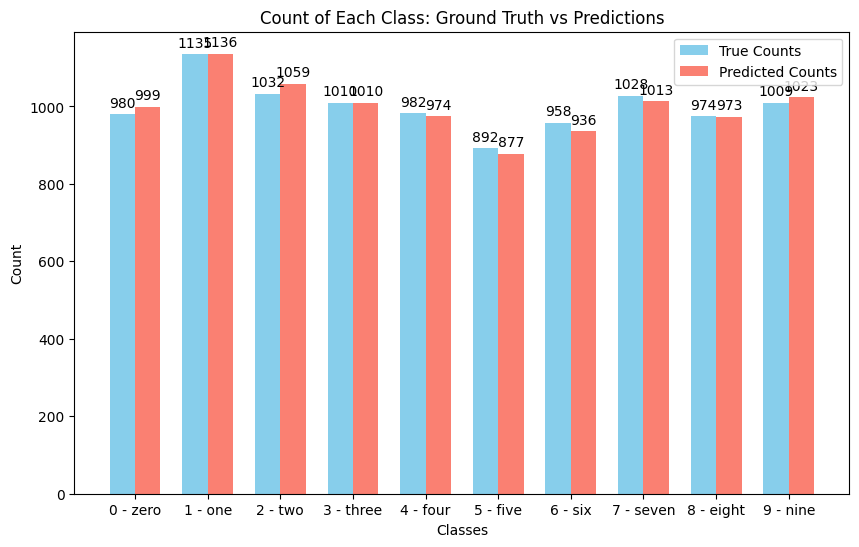

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Convert ground truth labels and predictions to numpy arrays
y_true_np = test_data.targets.numpy()
y_pred_np = torch.cat(y_preds).numpy()

# Assuming class_names is a list of the class labels in order (e.g., ['0', '1', ..., '9'])
num_classes = len(class_names)
indices = np.arange(num_classes)

# Count the number of occurrences for each class in true and predicted labels
true_counts = np.array([np.sum(y_true_np == i) for i in range(num_classes)])
pred_counts = np.array([np.sum(y_pred_np == i) for i in range(num_classes)])

# Plot a grouped bar chart
width = 0.35  # width of each bar
fig, ax = plt.subplots(figsize=(10, 6))
bars_true = ax.bar(indices - width/2, true_counts, width, label='True Counts', color='skyblue')
bars_pred = ax.bar(indices + width/2, pred_counts, width, label='Predicted Counts', color='salmon')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('Count of Each Class: Ground Truth vs Predictions')
ax.set_xticks(indices)
ax.set_xticklabels(class_names)
ax.legend()

# Optionally, add counts above bars for clarity
for bar in bars_true + bars_pred:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [51]:
import torch
import torch.nn as nn

torch.manual_seed(42)

# Create a random tensor of shape [1 ,3, 64, 64]
x = torch.randn(1, 3, 64, 64)

# Example 1: Standard conv with kernel_size=3, stride=1, padding=1
conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
out1 = conv1(x)
print("Output shape with conv1 (kernel_size=3, stride=1, padding=1):", out1.shape)
# Expected output shape: [1, 16, 64, 64]

# Example 2: Larger kernel, stride=2, and padding to maintain dimensions roughly
conv2 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5, stride=2, padding=2)
out2 = conv2(x)
print("Output shape with conv2 (kernel_size=5, stride=2, padding=2):", out2.shape)
# Expected output shape: [1, 8, 32, 32]

# Example 3: No padding with kernel_size=3, stride=1
conv3 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding =0)
out3 = conv3(x)
print("Output shape with conv3 (kernel_size=3, stride=1, padding=0):", out3.shape)
# Expected output shape: [1, 10, 62, 62]

Output shape with conv1 (kernel_size=3, stride=1, padding=1): torch.Size([1, 16, 64, 64])
Output shape with conv2 (kernel_size=5, stride=2, padding=2): torch.Size([1, 8, 32, 32])
Output shape with conv3 (kernel_size=3, stride=1, padding=0): torch.Size([1, 10, 62, 62])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [52]:
# Download FashionMNIST